# Day 3 - Exporatory Data Analysis (EDA) 
### Machine Learning Roadmap — Week 1
### Author: N Manish Kumar

### Today's Goal : 
Understand your cleaned Titanic dataset deeply by analyzing patterns, relationships, trends, and distributions.
This prepares you for training ML models.

## 1. Introduction
In this Notebook, I will :
- Load Cleaned Dataset
- Understand Feature Distributions
- Plot Important Relationships
- Compute survival rates across groups
- Build intuition about what features matter

## 2. Load Cleaned Dataset

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../Day2_Pandas/Data/titanic_cleaned.csv")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize
0,1,0,3,0,22.0,1,0,7.2500,False,True,2
1,2,1,1,1,38.0,1,0,71.2833,False,False,2
2,3,1,3,1,26.0,0,0,7.9250,False,True,1
3,4,1,1,1,35.0,1,0,53.1000,False,True,2
4,5,0,3,0,35.0,0,0,8.0500,False,True,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
 10  FamilySize   891 non-null    int64  
dtypes: bool(2), float64(2), int64(7)
memory usage: 64.5 KB


## 3. Univariate Analysis
Univariate = Analyzing One variable (one column) at a time.

### 3.1. Age Distribution
What this tells you:
- Are most passengers young or old?
- Is the distribution skewed (not normal)?
- Are there outliers (very old ages)?
- Should we consider binning age groups later?

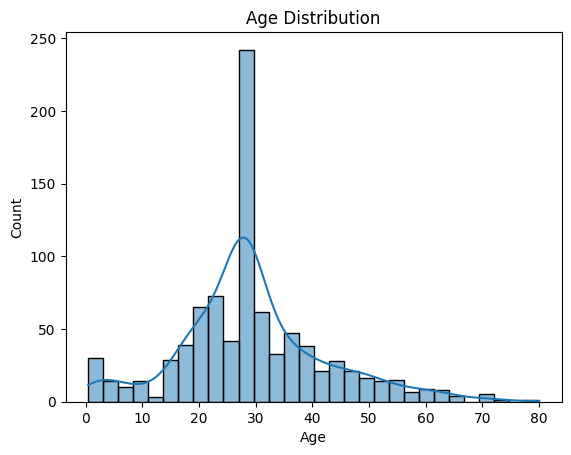

In [25]:
# histplot is histogram, kde=true adds a smooth curve showing distribution density
sns.histplot(df['Age'],kde=True) 
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#### Interpretation:
Typical Titanic pattern:
- Most passengers are between 20–35
- Very few above 60
- Some children

### 3.2. Fare Distribution
What this tells you:
- How much did people pay?
- Are there extremely high fares?
- Is the distribution skewed (usually right-skewed)
- Does this impact survival?

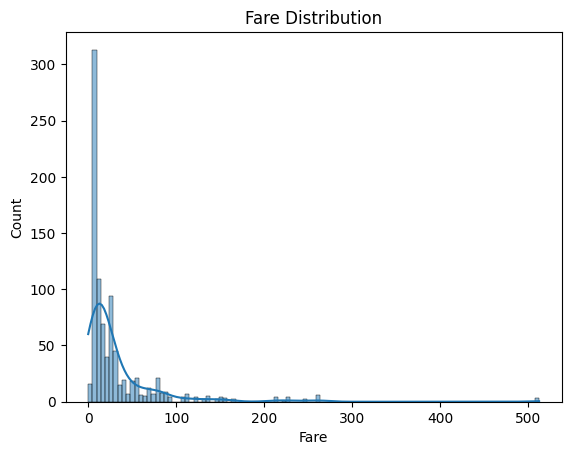

In [26]:
sns.histplot(df['Fare'],kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

#### Interpretation:
- Most fares are low (because many were 3rd class)
- A few passengers paid very high fares → outliers
- This indicates Fare correlates with passenger class (Pclass)

### 3.3. Survival Count
What this tells you:
- Dataset balance (how many survived vs didn’t survive)
- Whether the target variable is balanced or imbalanced
  (This affects model selection and evaluation metrics)

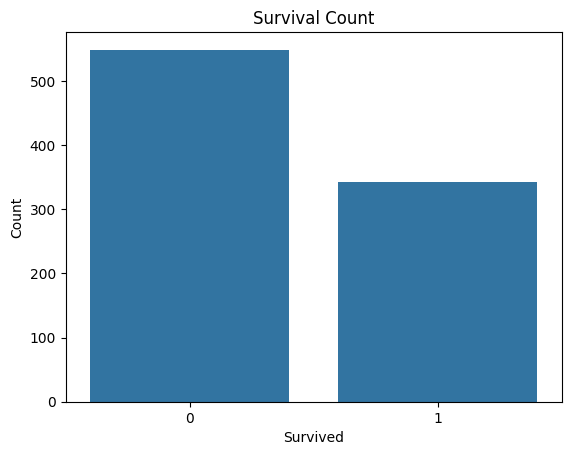

In [27]:
# Countplot shows the counts of observations in each categorical bin using bars.
sns.countplot(x='Survived',data=df)
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

#### Interpretation:
- Around 38% survived and around 62% died

## 4. Bivariate Analysis
Bivariate = Analyzing two variables(columns) at the same time.
Here the second variable is always your target : Survived

### 4.1. Sex vs Survival 
What this tells you:
- Did men or women survive more?
- Is there a strong pattern?
- Should “Sex” be included as a feature?

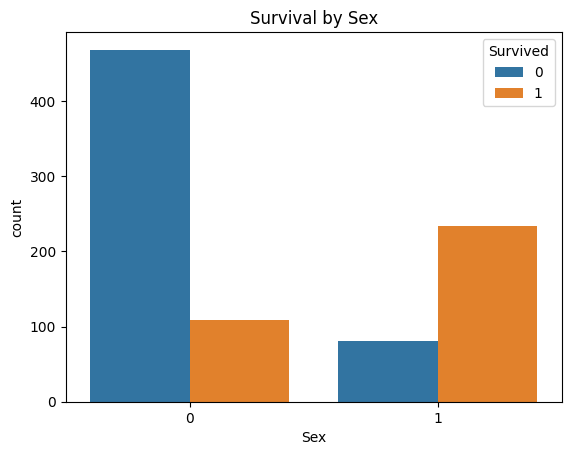

In [28]:
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title("Survival by Sex")
plt.show()

#### Interpretation:

##### Expected:
- Women survived far more (≈ 74%)
- Men survived much less (≈ 18%)
- This makes sense historically → “women and children first”.

##### ML intuition:
- Sex is a very powerful predictor
- Logistic regression, decision trees, random forests will use this heavily
- This feature alone could predict survival above 75%.

### 4.2. Passenger Class (Pclass) vs Survival
What this tells you:
- Were 1st class passengers more likely to survive?
- Is wealth/status a factor?
- Which class had the highest death toll?

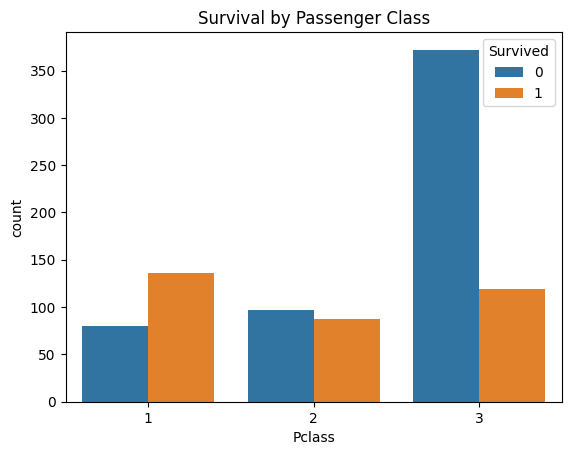

In [29]:
sns.countplot(x='Pclass',hue='Survived',data=df);
plt.title("Survival by Passenger Class")
plt.show()

#### Interpretation:

##### Expected:

Class	Survival Rate
1st	     ~63%
2nd	     ~47%
3rd	     ~24%
    
Why?
- 1st class had better cabins, closer to deck
- Faster access to lifeboats
- Crew prioritized upper-class passengers

##### ML intuition:
- Pclass is the second most important feature after Sex
- Very valuable for prediction

### 4.3. Age vs Survival
What this tells you:
- Did children survive more?
- Did older people struggle more?
- Should age be grouped/binned?

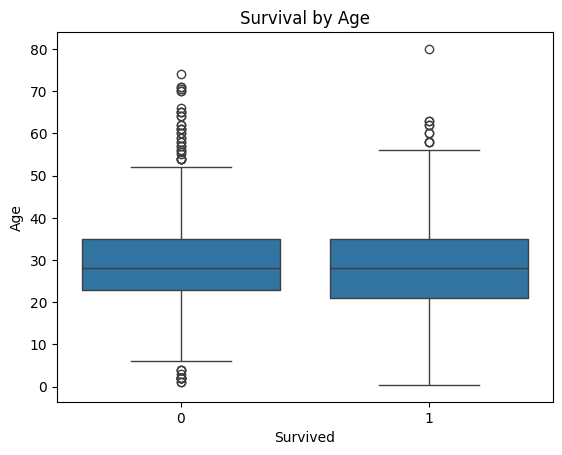

In [30]:
sns.boxplot(x='Survived',y='Age',data=df)
plt.title("Survival by Age")
plt.show()

#### Intrpretation 

##### What the boxplot shows:
- Median age of survivors is lower than non-survivors
- Children (< 10) had higher survival
- Elderly (> 60) had low survival
- Wide variability among adults

##### ML intuition:
- Raw age may not be the best feature
- Better: AgeGroup (0–12, 13–18, 18–40, etc.)
- Some ML models (trees) can still use raw Age fine

### 4.4. Fare vs Survival
What this tells you:
- Did passengers who paid more survive more?
- Does Fare reflect class/wealth?

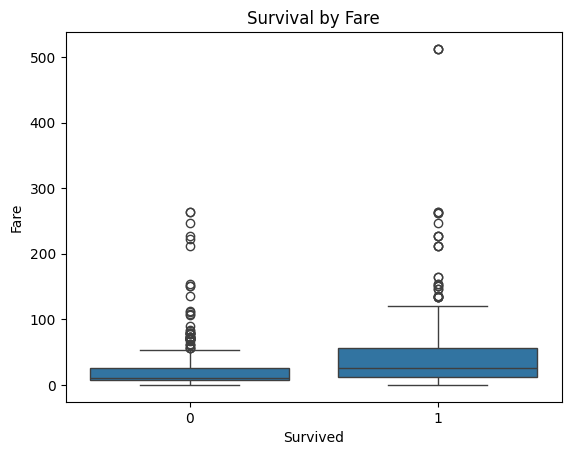

In [31]:
sns.boxplot(x='Survived',y='Fare',data=df)
plt.title("Survival by Fare")
plt.show()

#### Interpretation:

##### Expected:
- Survivors generally paid more
- High-fare extreme values → likely 1st class
- Non-survivors cluster around low fare values

##### ML intuition:
- Fare correlates with Pclass

### 4.5. FamilySize vs Survival
What this tells you:
- Does traveling alone harm survival chances?
- Do large families struggle?
- What is the optimal survival group?

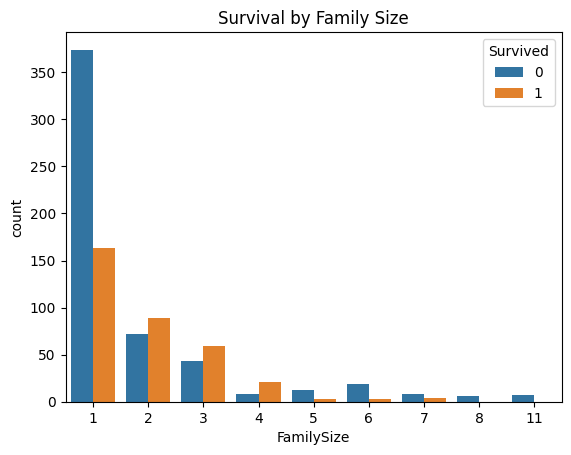

In [32]:
sns.countplot(x='FamilySize',hue='Survived',data=df)
plt.title("Survival by Family Size")
plt.show()

#### Interpretation:

Pattern:
- FamilySize = 1 (traveling alone) → low survival
- FamilySize = 2–4 → highest survival
- FamilySize ≥ 7 → almost 0 survival

##### ML intuition:
- You discovered a non-linear pattern:
- Good survival in middle sizes
- Poor survival for very small or very large groups

This means:

- Logistic regression may struggle without feature engineering
- Tree models can capture this naturally
- You may consider grouping : Alone / Medium / Large

## 5. Groupby Insights
groupby is used to calculate statistics for each group in the dataset.
Here we use it to compute the survival rate across different groups:
- Sex
- Pclass
- FamilySize
- Age bins

### 5.1. Survival Rate by Sex

In [33]:
df.groupby('Sex')['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

Sex	Survival Rate :
- female	~0.74
- male	~0.18

#### Interpretation:
- Females survived 4× more than males.
- This confirms the "Women & children first" evacuation rule.
- Sex is the strongest predictive feature in the entire dataset.

#### ML intuition:
- Logistic Regression will give a huge positive weight to female.
- Decision Trees will split on Sex first.

### 5.2. Survival Rate by Passenger Class

In [34]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Pclass	Survival Rate :
- 1	    ~0.62
- 2	    ~0.47
- 3	    ~0.24

#### Interpretation:
- 1st class passengers survived most
- 3rd class: highest deaths → far from lifeboats

#### ML intuition:
- Pclass gets a strong weight
- This feature clearly separates passengers by survival chance

### 5.3. Survival by Embarked Port (Q,S,C)

In [35]:
df.groupby('Embarked_S')['Survived'].mean()

Embarked_S
False    0.502041
True     0.339009
Name: Survived, dtype: float64

    Port	        Survival
- C (Cherbourg)	    highest
- S (Southampton)	lowest

This reflects:
- Wealthier passengers boarded at Cherbourg
- More 3rd-class boarded at Southampton

Note :- This is only applicable if I had encoded Embarked as Dummy Variables earlier (I did not do it). But let's assume C to be True while S to be False.

### 5.4. Survival by FamilySize

In [36]:
df.groupby('FamilySize')['Survived'].mean()

FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

#### Interpretation
  FamilySize	Survival Rate
- 1	           very low (~0.30–0.35)
- 2–4	       highest (~0.50–0.60)
- 5–7	       lower
- 8+	       almost zero


Reason:
- People traveling alone → no support → low survival
- Medium-sized families → helped each other → moderate survival
- Very large families → chaos, difficulty boarding → very low survival

#### ML intuition:
- This is non-linear.
- Tree-based models (Random Forest, XGBoost) capture this naturally.
- Linear models require transforming FamilySize into groups.

### 5.5. Survival by Age Group 

In [37]:
df['AgeGroup']= pd.cut(df['Age'],bins = [0,12,18,35,60,100],labels=['Child','Teen','Adult','Middle-Aged','Senior'])

In [38]:
df.groupby('AgeGroup',observed=False)['Survived'].mean()

AgeGroup
Child          0.579710
Teen           0.428571
Adult          0.353271
Middle-Aged    0.400000
Senior         0.227273
Name: Survived, dtype: float64

Expected Results:
- Children: highest survival
- Teen/adult: medium
- Middle-aged: lower
- Seniors: lowest survival
This further proves the “women and children first” rule.

## 6. Correlation Hetmap
A correlation heatmap is a colour-coded grid that shows how strongly each numeric variable is related to every other numeric variable.

### What is correlation? 

Correlation measures how two numerical variables move together.

+1.0 → perfect positive relationship

-1.0 → perfect negative relationship

0.0 → no relationship

Simple examples:

✔ High positive correlation

   As Fare increases, Pclass decreases (because higher fare = class 1).

✔ High negative correlation

   As Sex (0 = male, 1 = female) increases, Survived increases → females survive more.

✔ Near zero correlation

   Age vs Survived (weak relationship)

### Why correlation matters in ML

Correlation tells you:

✔ Which features are good predictors

Example: Sex and Pclass strongly correlate with survival.

✔ Which features are redundant

Example: Fare and Pclass often contain similar information.

✔ Which transformations might be helpful

Example: Fare may be right-skewed → log transform could help.

✔ What the ML model is likely to learn

High correlation → strong model weights for those features.

In [39]:
df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked_Q         bool
Embarked_S         bool
FamilySize        int64
AgeGroup       category
dtype: object

In [40]:
df= pd.get_dummies(df,columns=['AgeGroup'],drop_first=True)

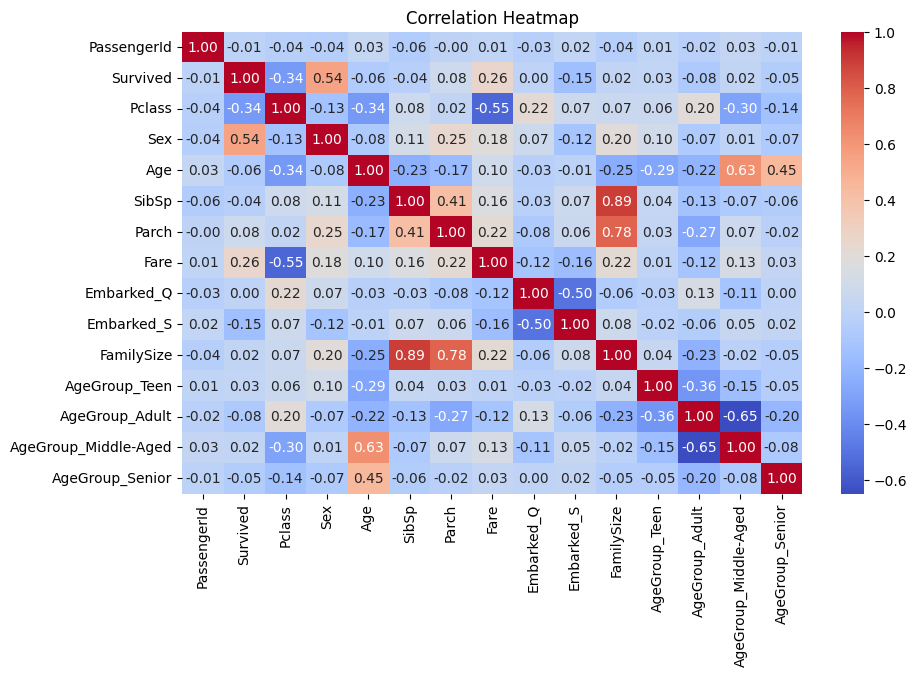

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Correlation Heatmap Insights
- Pclass and Fare are the strongest predictors of survival.
- Sex also correlates strongly with survival (females survive more).
- Age has a weak correlation because the relationship is non-linear.
- FamilySize also has a non-linear relationship → weak direct correlation.
- Adults, Seniors, and Middle-aged groups show negative correlation with survival.
- Fare is strongly correlated with Pclass, meaning class already captures some fare information.
- Sibling/Spouse (SibSp) and Parent/Child (Parch) correlate strongly with FamilySize — expected due to construction.

# 7. EDA Summary & Insights

## Univariate Insights
- Age distribution is right-skewed, with most passengers between 20–35 years.
- Fare distribution is heavily right-skewed due to a small number of very high fares.
- Survival is imbalanced: ~38% survived, ~62% died.
- FamilySize is mostly small (1–3), with very few large families.

Why this matters for ML:

Skewed distributions may require transformations (log, binning).

Class imbalance means accuracy is NOT a reliable metric.

---

## Bivariate Insights 

Focus: patterns vs Survived

Bivariate Insights
- Females survived at a much higher rate than males → strongest predictive feature.
- 1st class passengers had the highest survival rate, 3rd class the lowest.
- Children (<12) show a noticeably higher survival rate than adults and seniors.
- Higher fares are associated with higher survival → wealth/status mattered.
- FamilySize has a non-linear relationship:
- People traveling alone had low survival
- Medium-sized families (2–4) had the best survival
- Very large families had poor survival

Why this matters for ML:

Non-linear patterns mean simple linear models won’t capture trends unless we engineer features.

---

## Groupby Insights 

Focus: numerical survival rates

Groupby Insights
- Females: ~74% survived.
- Males: ~18% survived.
- 1st class: ~63% survived.
- 3rd class: ~24% survived.
- Children: high survival;     seniors: lowest survival.
- FamilySize = 1 → low survival;    2–4 → best survival;    7+ → almost no survival.

Why this matters for ML:

Features like Sex, Pclass, AgeGroup, and FamilySize carry high predictive power.

---

## Correlation Insights 

Focus: numeric relationships

Correlation Insights
- Pclass, Fare, and Sex show the strongest correlation with Survived.
- Fare and Pclass are strongly negatively correlated, meaning they describe similar economic status.
- Age has weak correlation with Survived, reflecting non-linear patterns.
- FamilySize, SibSp, and Parch are moderately correlated (expected as FamilySize is derived).
- AgeGroup dummy variables show:
- Adults, middle-aged, and seniors are negatively associated with survival
- Teens slightly positive

Why this matters for ML:

Correlation helps identify feature redundancy and importance.

---

## Final EDA Conclusions

- The highest survival probability is for female, 1st class, children, and medium-sized families.
- The strongest predictors of survival are Sex, Pclass, Fare, and AgeGroup.
- FamilySize and Embarked also provide useful signals.
- Age and Fare exhibit skewed distributions that may need transformation for ML.
- There is mild multicollinearity between Fare and Pclass, which must be considered when selecting models.
- Overall, the data shows clear social and economic survival patterns:

  ✔ Women & children first
  
  ✔ Wealthier passengers had better access to lifeboats
  
  ✔ Traveling alone reduced survival chance